# 从0实现

In [9]:
%matplotlib inline
import torch
import torch.nn as nn
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

### 数据预处理

In [7]:
def load_data(batch_size,resize=None):
    '''下载数据集，将其加载到内存中'''
    trans = [transforms.ToTensor()]
    if resize:                       #是否对原始数据进行大小变换处理
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    
    mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)    #读取和加在数据集，使用torchvision中内置的数据
    mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=4),data.DataLoader(mnist_test,batch_size,shuffle=True,num_workers=4))

In [46]:
def get_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [49]:
#可视化训练样本
def show_image(imgs,num_rows,num_cols, titles=None, scale=1.5):
    #绘制列表
    figsize=(num_cols*scale,num_rows*scale)
    fig,axes = plt.subplots(num_rows,num_cols,figsize=figsize)   #subplot用来创建总画布
    axes=axes.flatten()
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
#     ax.axes.get_xaxis().set_visible(False)
#     ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [8]:
batch_size=256
train_iter,test_iter=load_data(batch_size)

### 初始化模型参数
两层的感知器

In [11]:
num_inputs,num_outputs,num_hiddens=784,10,256
W1= nn.Parameter(torch.normal(0,0.01,(num_inputs,num_hiddens),requires_grad=True))
b1= nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2= nn.Parameter(torch.normal(0,0.01,(num_hiddens,num_outputs),requires_grad=True))
b1= nn.Parameter(torch.zeros(num_outputs,requires_grad=True))
params=[W1,W1,b1,b2]

### 模型

In [33]:
def net(x):
    x = x.reshape(-1,num_inputs)
    H=torch.relu(torch.mm(x,W1)+b1)
    out = torch.mm(H,W2)+b2
    return out

In [13]:
loss = torch.nn.CrossEntropyLoss()

In [32]:
optimizer=torch.optim.SGD(params,lr=0.1)

### 训练

In [41]:
def evaluate_accuracy(test_iter,net):
    acc_sum,n=0.0,0
    for X,y in test_iter:
        y_hat = net(X)
        acc_sum += (y_hat.argmax(axis=1)==y).sum().item()
        n += y.shape[0]
        
    return acc_sum/n
        

In [42]:
num_epochs=10
lr=0.1
def train_ch3(net,train_iter,test_iter,loss,optimizer,num_epochs,batch_size):
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n=0.0,0.0,0
        for X,y in train_iter:
            y_hat=net(X)
            l=loss(y_hat,y).sum()
            
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and paras[0].grad is not None:
                param.grad.data.zero_()
                
            l.backward()
            
            if optimizer is None:
                torch.optim.SGD(params,lr=0.1)
            else:
                optimizer.step()
                
            train_l_sum+= l.item()
            train_acc_sum+= (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
            
        test_acc = evaluate_accuracy(test_iter,net)
        print('epoch %d, loss %.4f, train_acc %.3f, test_acc %.3f' %(epoch+1,train_l_sum/n, train_acc_sum/n,test_acc))
        

In [43]:
train_ch3(net,train_iter,test_iter,loss,optimizer,num_epochs,batch_size)

epoch 1, loss 0.0039, train_acc 0.737, test_acc 0.733
epoch 2, loss 0.0035, train_acc 0.751, test_acc 0.747
epoch 3, loss 0.0032, train_acc 0.759, test_acc 0.754
epoch 4, loss 0.0031, train_acc 0.766, test_acc 0.759
epoch 5, loss 0.0029, train_acc 0.770, test_acc 0.764
epoch 6, loss 0.0028, train_acc 0.776, test_acc 0.768
epoch 7, loss 0.0028, train_acc 0.780, test_acc 0.772
epoch 8, loss 0.0027, train_acc 0.783, test_acc 0.776
epoch 9, loss 0.0026, train_acc 0.787, test_acc 0.777
epoch 10, loss 0.0026, train_acc 0.789, test_acc 0.781


### 预测

In [47]:
for X,y in test_iter:
    break
true_labels = get_labels(y)
pred_labels = get_labels(net(X).argmax(axis=1).numpy())


array([<AxesSubplot:title={'center':'trouser\ntrouser'}>,
       <AxesSubplot:title={'center':'sandal\nbag'}>,
       <AxesSubplot:title={'center':'trouser\ntrouser'}>,
       <AxesSubplot:title={'center':'dress\ndress'}>,
       <AxesSubplot:title={'center':'shirt\nsandal'}>,
       <AxesSubplot:title={'center':'ankle boot\nankle boot'}>,
       <AxesSubplot:title={'center':'ankle boot\nankle boot'}>,
       <AxesSubplot:title={'center':'coat\ncoat'}>,
       <AxesSubplot:title={'center':'trouser\ntrouser'}>,
       <AxesSubplot:title={'center':'bag\nsneaker'}>], dtype=object)

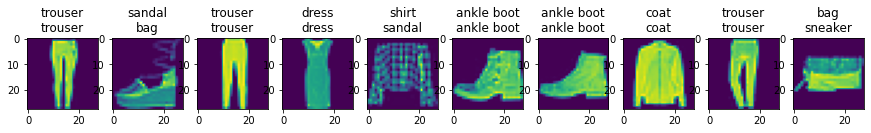

In [53]:
titles =[true+'\n'+ pred for true, pred in zip(true_labels,pred_labels)] 
show_image(X[:10].reshape(-1,28,28), 1, 10,titles=titles[:10])

# 简洁实现
调用接口能够较快达到训练的时间

In [69]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x):
        return x.view(x.shape[0], -1) 

In [76]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs,num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens,num_outputs))
for param in net.parameters():
    torch.normal(param)


In [84]:
def l2_penalty(w):
    return (w**2).sum()/2

In [80]:
batch_size = 256
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
num_epochs = 10

In [81]:
train_ch3(net,train_iter,test_iter,loss,optimizer,num_epochs,None)

epoch 1, loss 0.0011, train_acc 0.892, test_acc 0.846
epoch 2, loss 0.0011, train_acc 0.896, test_acc 0.849
epoch 3, loss 0.0011, train_acc 0.897, test_acc 0.861
epoch 4, loss 0.0011, train_acc 0.900, test_acc 0.862
epoch 5, loss 0.0010, train_acc 0.902, test_acc 0.868
epoch 6, loss 0.0010, train_acc 0.905, test_acc 0.874
epoch 7, loss 0.0010, train_acc 0.906, test_acc 0.880
epoch 8, loss 0.0010, train_acc 0.907, test_acc 0.873
epoch 9, loss 0.0010, train_acc 0.911, test_acc 0.802
epoch 10, loss 0.0009, train_acc 0.911, test_acc 0.854


In [86]:
net.parameters().data

AttributeError: 'generator' object has no attribute 'data'

array([<AxesSubplot:title={'center':'bag\nbag'}>,
       <AxesSubplot:title={'center':'t-shirt\nshirt'}>,
       <AxesSubplot:title={'center':'trouser\ntrouser'}>,
       <AxesSubplot:title={'center':'pullover\npullover'}>,
       <AxesSubplot:title={'center':'trouser\ntrouser'}>,
       <AxesSubplot:title={'center':'pullover\nshirt'}>,
       <AxesSubplot:title={'center':'bag\npullover'}>,
       <AxesSubplot:title={'center':'coat\ncoat'}>,
       <AxesSubplot:title={'center':'dress\ndress'}>,
       <AxesSubplot:title={'center':'pullover\npullover'}>], dtype=object)

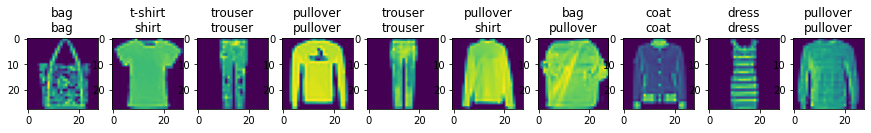

In [82]:
for X,y in test_iter:
    break
true_labels = get_labels(y)
pred_labels = get_labels(net(X).argmax(axis=1).numpy())
titles =[true+'\n'+ pred for true, pred in zip(true_labels,pred_labels)] 
show_image(X[:10].reshape(-1,28,28), 1, 10,titles=titles[:10])

 # 权重衰减
相当于给损失函数加上$L_2$范数正则化，防止过拟合的产生。